# 🔲 Pad and frame

In [ ]:
#| default_exp utils.pad

In [ ]:
# |hide
from nbdev.showdoc import *
from PIL import Image
from lovely_numpy import Lo

In [ ]:
# |hide

# monkey_patch()

In [ ]:
# |hide
# |export
import numpy as np

In [ ]:
# |hide
in_stats = { "mean": (0.485, 0.456, 0.406), "std": (0.229, 0.224, 0.225) }

image =np.load("mysteryman.npy")
image = (image * np.array(in_stats["std"])[:,None,None])
image += np.array(in_stats["mean"])[:,None,None]

# image = image.numpy()
Lo(image)

# image.rgb

array[3, 196, 196] n=115248 (0.9Mb) x∈[-4.053e-09, 1.000] μ=0.361 σ=0.248

In [ ]:
# |export
def pad_frame(t: np.ndarray, # torch.Tensor,  # 3D+ image tensor, [...,H,W,C]
              frame_px: int=1,       # Number of pixels to pad each side.
              val :float=0):           # Value to pad with.
    """Pad H and W dimensitons of an image tensor with `val` of thickness `frame_px`"""
    assert t.ndim >= 3

    return np.pad(t, pad_width=[(0,0)] * (t.ndim-3) # Don't pad higher dims
                  + [(frame_px,frame_px)] * 2 #  H and W get padded
                  + [(0,0)], # C does not get padded
                  constant_values=val)


Examples

In [ ]:
pad_frame(np.zeros((3,3,1)), frame_px=2, val=1).transpose(-1,0,1).astype(int)

array([[[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1]]])

In [ ]:
# 1px black frame inside 2px white frame (gutter).
pad_frame(pad_frame(np.ones((3,3,1))), frame_px=2, val=1 ).transpose(-1,0,1).astype(int)

array([[[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0, 0, 0, 1, 1],
        [1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 0, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]]])

In [ ]:
# |export
def pad_frame_gutters(t: np.ndarray,  # 3D+ Tensor image tensor, [...,H,W,C]
                      gutter_px=3,      # Write gutter in pixels.
                      frame_px=1):      # Black frame, in pixels
    """Add a black frame and white gutters around an image"""
    assert t.ndim >= 3
    xy_shape = t.shape[-2:]
    # gutter_px = ceil(max(xy_shape)*gutter_frac//2)

    # XXX This does not work for RGBA images, as the alpha channel is set to 0!
    t = pad_frame(t, frame_px=frame_px, val=0) # Black frame
    return pad_frame(t, frame_px=gutter_px, val=1) # White gutters between images

Examples

In [ ]:
Lo(image)

array[3, 196, 196] n=115248 (0.9Mb) x∈[-4.053e-09, 1.000] μ=0.361 σ=0.248

In [ ]:
Lo(pad_frame_gutters(image.transpose(1, 2, 0), gutter_px=15, frame_px=3))

array[232, 232, 3] n=161472 (1.2Mb) x∈[-4.053e-09, 1.000] μ=0.500 σ=0.359

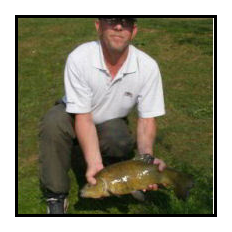

In [ ]:
def to_pil(x):
    return Image.fromarray(np.uint8(x*255))

to_pil(pad_frame_gutters(image.transpose(1, 2, 0), gutter_px=15, frame_px=3))

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()